In [2]:
from vit_keras import vit
import tensorflow_addons as tfa
from keras.src.utils import image_dataset_from_directory
from tensorflow import keras


train_data = image_dataset_from_directory(
    'C:/Users/Lukas/PycharmProjects/UM/Lab3/train',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=20,
    image_size=(160, 160),
    shuffle=True,
)

val_data = image_dataset_from_directory(
    'C:/Users/Lukas/PycharmProjects/UM/Lab3/validation',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=20,
    image_size=(160, 160),
    shuffle=True,
)

test_data = image_dataset_from_directory(
    'C:/Users/Lukas/PycharmProjects/UM/Lab3/test',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=20,
    image_size=(160, 160),
    shuffle=True,
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [20]:
from tensorflow.keras import layers

vit_model = vit.vit_b32(
    image_size=(160, 160),
    activation='sigmoid',
    pretrained=True,
    include_top=False,
    pretrained_top=False,
    classes=2,
)

for layer in vit_model.layers:
    layer.trainable = False

vit_model.summary()

# Add Dense layers on top of ViT feature extractor
inputs = keras.Input(shape=(160, 160, 3))
x = layers.Rescaling(1.0 / 255)(inputs)
x = vit_model(inputs, training=False)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.summary()


Model: "vit-b32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 160, 160, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 5, 5, 768)         2360064   
                                                                 
 reshape_8 (Reshape)         (None, 25, 768)           0         
                                                                 
 class_token (ClassToken)    (None, 26, 768)           768       
                                                                 
 Transformer/posembed_input  (None, 26, 768)           19968     
  (AddPositionEmbs)                                              
                                                                 
 Transformer/encoderblock_0  ((None, 26, 768),         7087872   
  (TransformerBlock)          (None, 12, None, None)       

In [21]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
)

Epoch 1/5
100/100 [==============================] - 101s 857ms/step - loss: 0.7467 - accuracy: 0.5285 - val_loss: 0.6915 - val_accuracy: 0.5380
Epoch 2/5
100/100 [==============================] - 84s 840ms/step - loss: 0.7123 - accuracy: 0.5410 - val_loss: 0.6841 - val_accuracy: 0.5410
Epoch 3/5
100/100 [==============================] - 81s 812ms/step - loss: 0.6874 - accuracy: 0.5665 - val_loss: 0.6928 - val_accuracy: 0.5370
Epoch 4/5
100/100 [==============================] - 80s 797ms/step - loss: 0.6663 - accuracy: 0.5800 - val_loss: 0.6848 - val_accuracy: 0.5620
Epoch 5/5
100/100 [==============================] - 81s 814ms/step - loss: 0.6638 - accuracy: 0.5935 - val_loss: 0.6800 - val_accuracy: 0.5670


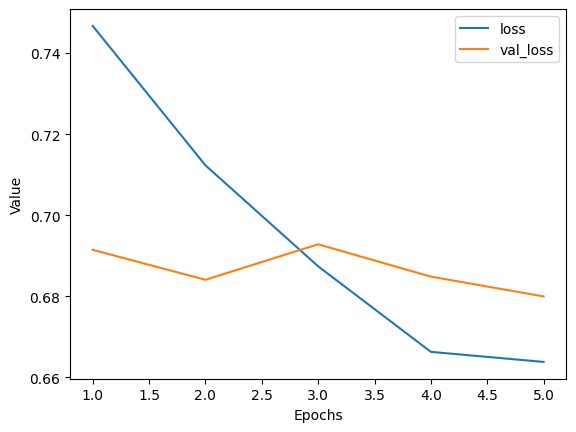

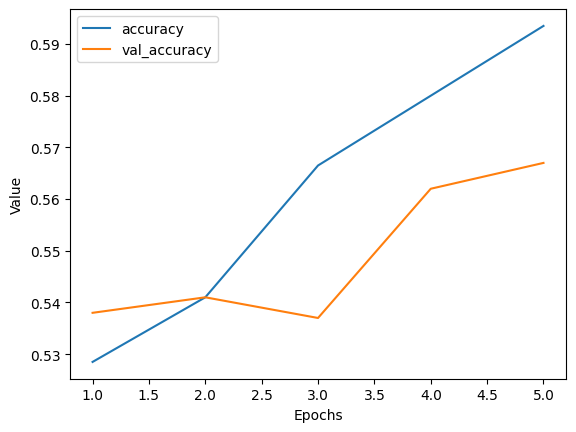

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='loss')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='accuracy')
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

In [23]:
#print confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(test_data)
y_pred = np.round(y_pred)
y_true = np.concatenate([y for x, y in test_data], axis=0)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
print(cm)


50/50 [==============================] - 32s 567ms/step
[[171 329]
 [176 324]]


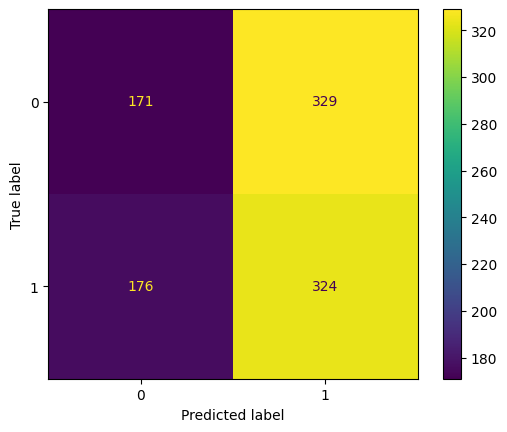

In [24]:
disp.plot()

In [33]:
from vit_keras import visualize

image = keras.preprocessing.image.load_img('C:/Users/Lukas/PycharmProjects/UM/Lab3/test/class_a/cat.1500.jpg', target_size=(160, 160))

image = keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.


attention_map = visualize.attention_map(model = model, image = image)


IndexError: list index out of range